# **IEC-03 Project: Estimating Aqueous Solubility Directly From Molecular Structure**

## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## **Load Data**

In [ ]:
df = pd.read_csv("delaney_solubility_with_descriptors.csv")

## **Data Preparation**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(["logS"],axis=1),df["logS"],test_size=0.2,random_state=100)
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)


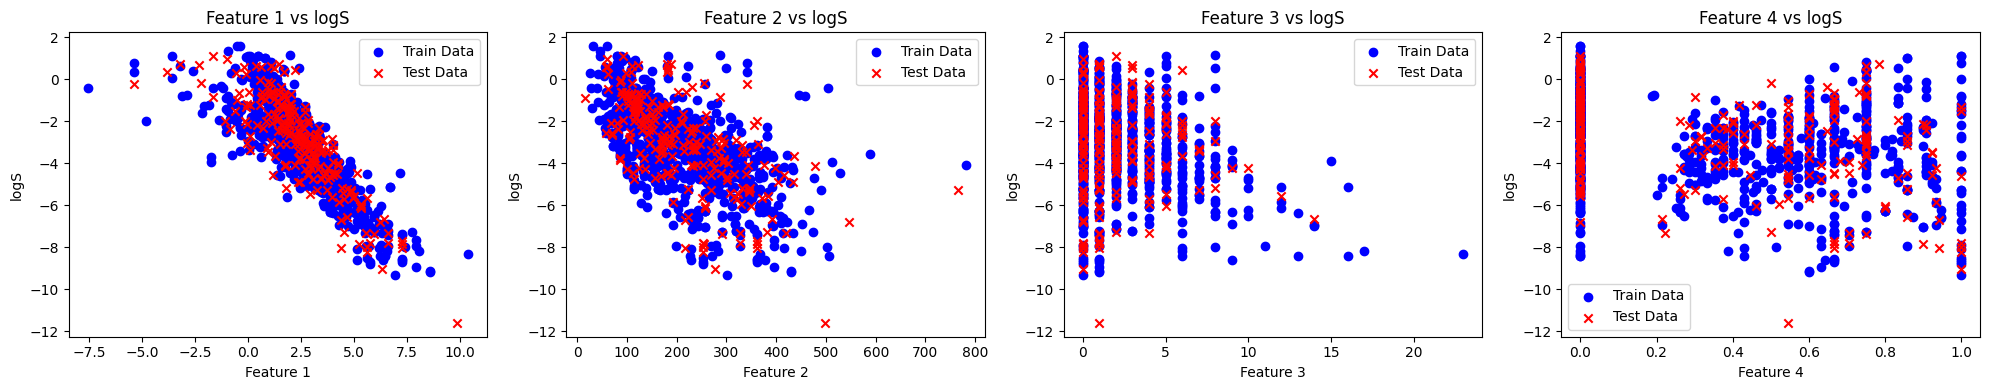

In [ ]:
num_features = X_train.shape[1]

fig, axes = plt.subplots(1, num_features, figsize=(5 * num_features, 4))

for i in range(num_features):
    axes[i].scatter(X_train[:, i], y_train, color='blue', label='Train Data', marker='o')

    axes[i].scatter(X_test[:, i], y_test, color='red', label='Test Data', marker='x')

    axes[i].set_xlabel(f'Feature {i + 1}')
    axes[i].set_ylabel('logS')
    axes[i].set_title(f'Feature {i + 1} vs logS')
    axes[i].legend()

fig.tight_layout()

plt.show()

## **Exploratory Data Analysis (EDA)**

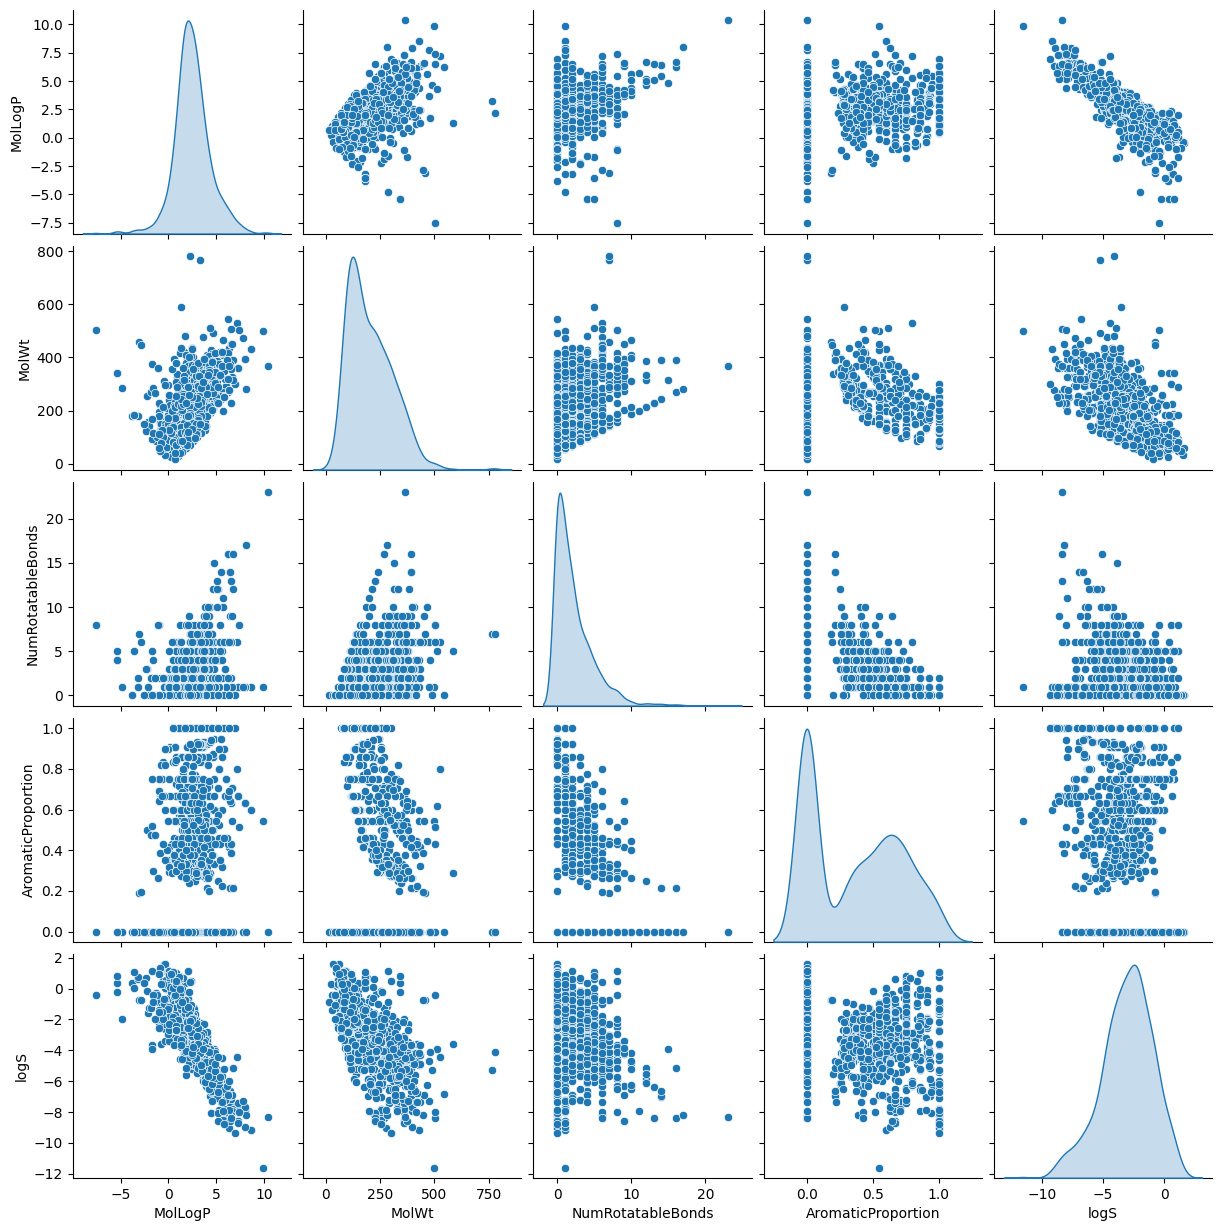

In [ ]:
sns.pairplot(df, diag_kind='kde')
plt.show()

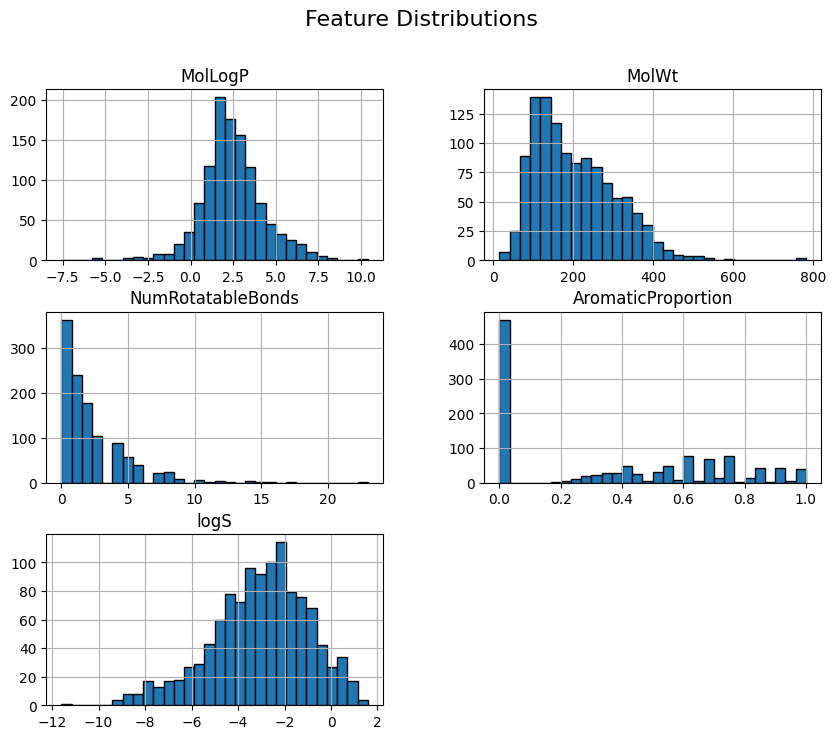

In [ ]:
df.hist(bins=30, figsize=(10, 8), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

Pearson correlation to detect linear relationships between the features and the target.

                     MolLogP     MolWt  NumRotatableBonds  AromaticProportion  \
MolLogP             1.000000  0.468097           0.205607            0.250977   
MolWt               0.468097  1.000000           0.394219            0.098855   
NumRotatableBonds   0.205607  0.394219           1.000000           -0.296737   
AromaticProportion  0.250977  0.098855          -0.296737            1.000000   
logS               -0.827959 -0.637324          -0.238508           -0.268108   

                        logS  
MolLogP            -0.827959  
MolWt              -0.637324  
NumRotatableBonds  -0.238508  
AromaticProportion -0.268108  
logS                1.000000  


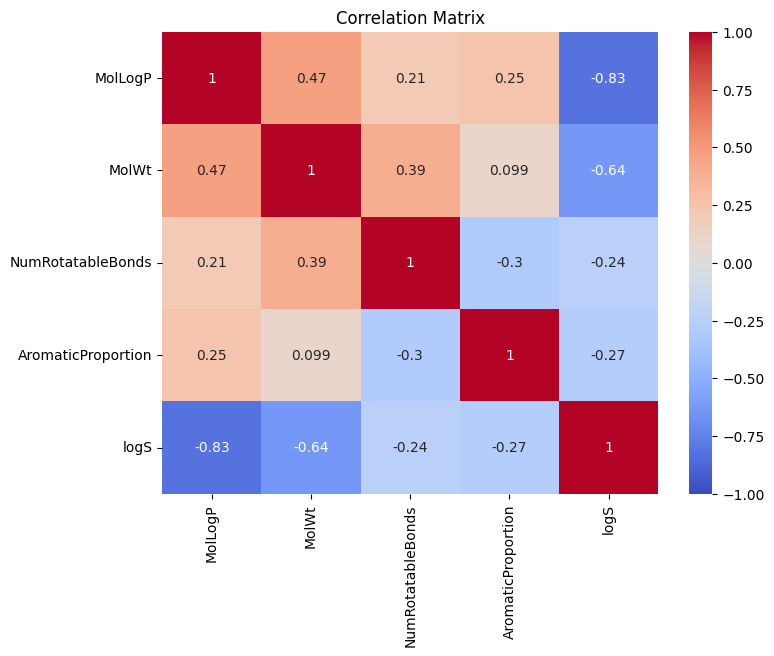

In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


## **Feature Scaling**

In [ ]:
scaler = StandardScaler()
data_scaled = df.copy()
data_scaled[['MolLogP', 'MolWt', 'NumRotatableBonds', 'AromaticProportion']] = scaler.fit_transform(
    df[['MolLogP', 'MolWt', 'NumRotatableBonds', 'AromaticProportion']])

print("Standardized Features:")
print(data_scaled.head())


Standardized Features:
    MolLogP     MolWt  NumRotatableBonds  AromaticProportion  logS
0  0.078419 -0.358581          -0.827778           -1.063461 -2.18
1 -0.038941 -0.694382          -0.827778           -1.063461 -2.00
2  0.077562 -0.358581          -0.447007           -1.063461 -1.74
3 -0.225304 -0.694382          -0.447007           -1.063461 -1.48
4  0.251860 -0.168234          -0.447007           -1.063461 -3.04


## **Model Selection**


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Linear Regression

In [ ]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

y_pred_linear = linear_regression.predict(X_test)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

results = {}
results["Linear Regression"] = {"RMSE": rmse_linear, "MAE": mae_linear, "R²": r2_linear}

### Lasso Regression

In [ ]:
lasso_regression = Lasso(alpha=0.1)

lasso_regression.fit(X_train, y_train)

y_pred_lasso = lasso_regression.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

results["Lasso Regression"] = {"RMSE": rmse_lasso, "MAE": mae_lasso, "R²": r2_lasso}


### Ridge Regression

In [ ]:
ridge_regression = Ridge(alpha=1)

ridge_regression.fit(X_train, y_train)

y_pred_ridge = ridge_regression.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

results["Ridge Regression"] = {"RMSE": rmse_ridge, "MAE": mae_ridge, "R²": r2_ridge}


### Random Forest

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=100)

random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

results["Random Forest"] = {"RMSE": rmse_rf, "MAE": mae_rf, "R²": r2_rf}


### Gradient Boosting

In [ ]:
gradient_boosting = GradientBoostingRegressor(random_state=100)

gradient_boosting.fit(X_train, y_train)

y_pred_gb = gradient_boosting.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

results["Gradient Boosting"] = {"RMSE": rmse_gb, "MAE": mae_gb, "R²": r2_gb}


### Support Vector Regression

In [ ]:
svm = SVR(kernel='rbf', C=1, gamma='scale')

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

results["Support Vector Machine"] = {"RMSE": rmse_svm, "MAE": mae_svm, "R²": r2_svm}


### Neural Network

In [ ]:
!pip install tensorflow


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a simpler model
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(256, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dense(1))


model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Callbacks: EarlyStopping, ReduceLROnPlateau, and ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

history = model.fit(X_train_scaled, y_train,
                    epochs=2000,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=0,
                    callbacks=[early_stopping, reduce_lr, checkpoint])

# Load the best model saved by ModelCheckpoint
model.load_weights('best_model.keras')


y_pred = model.predict(X_test_scaled).flatten()


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


results["Neural Network"] = {"RMSE": rmse, "MAE": mae, "R²": r2}

results


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


{'Linear Regression': {'RMSE': 1.0102946926942176,
  'MAE': 0.7798302326536797,
  'R²': 0.7891616188563282},
 'Lasso Regression': {'RMSE': 1.025845048279339,
  'MAE': 0.798885406675093,
  'R²': 0.7826212621559017},
 'Ridge Regression': {'RMSE': 1.0103883829466311,
  'MAE': 0.7798890727548345,
  'R²': 0.7891225126089793},
 'Random Forest': {'RMSE': 0.8040286741234801,
  'MAE': 0.5810539700734735,
  'R²': 0.8664645407224186},
 'Gradient Boosting': {'RMSE': 0.8189825929411105,
  'MAE': 0.6074616677710413,
  'R²': 0.8614511669669058},
 'Support Vector Machine': {'RMSE': 0.8792788889295506,
  'MAE': 0.6371187630655488,
  'R²': 0.8402992991618514},
 'Neural Network': {'RMSE': 0.7211888416044109,
  'MAE': 0.5363737058415683,
  'R²': 0.8925635803117064}}

### Model Performance Comparison:

In [ ]:
results_df = pd.DataFrame(results).T.sort_values(by="RMSE")

print("Model Performance Comparison:")
results_df

Model Performance Comparison:


,RMSE,MAE,R²
Neural Network,0.721189,0.536374,0.892564
Random Forest,0.804029,0.581054,0.866465
Gradient Boosting,0.818983,0.607462,0.861451
Support Vector Machine,0.879279,0.637119,0.840299
Linear Regression,1.010295,0.779830,0.789162
Ridge Regression,1.010388,0.779889,0.789123
Lasso Regression,1.025845,0.798885,0.782621


## Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}


In [ ]:
rf_random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=100),
                                      param_distributions=rf_param_grid,
                                      scoring='neg_mean_squared_error',
                                      n_iter=10,
                                      cv=3,
                                      n_jobs=-1,
                                      random_state=100)

gb_random_search = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=100),
                                      param_distributions=gb_param_grid,
                                      scoring='neg_mean_squared_error',
                                      n_iter=10,
                                      cv=3,
                                      n_jobs=-1,
                                      random_state=100)


In [ ]:
rf_random_search.fit(X_train, y_train)
gb_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=100),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300]},
                   random_state=100, scoring='neg_mean_squared_error')

In [ ]:
print("Random Forest Best Parameters:", rf_random_search.best_params_)
print("Random Forest Best RMSE:", np.sqrt(-rf_random_search.best_score_))

print("Gradient Boosting Best Parameters:", gb_random_search.best_params_)
print("Gradient Boosting Best RMSE:", np.sqrt(-gb_random_search.best_score_))


Random Forest Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
Random Forest Best RMSE: 0.7416192074200032
Gradient Boosting Best Parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Gradient Boosting Best RMSE: 0.7773350705812617


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

best_rf = rf_random_search.best_estimator_
best_gb = gb_random_search.best_estimator_

def evaluate_best_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2

rf_rmse, rf_mae, rf_r2 = evaluate_best_model(best_rf, X_test, y_test)
gb_rmse, gb_mae, gb_r2 = evaluate_best_model(best_gb, X_test, y_test)

print("Random Forest - RMSE:", rf_rmse, "MAE:", rf_mae, "R²:", rf_r2)
print("Gradient Boosting - RMSE:", gb_rmse, "MAE:", gb_mae, "R²:", gb_r2)


Random Forest - RMSE: 0.8040286741234801 MAE: 0.5810539700734735 R²: 0.8664645407224186
Gradient Boosting - RMSE: 0.8002547585382999 MAE: 0.5926847833108457 R²: 0.8677151648704062


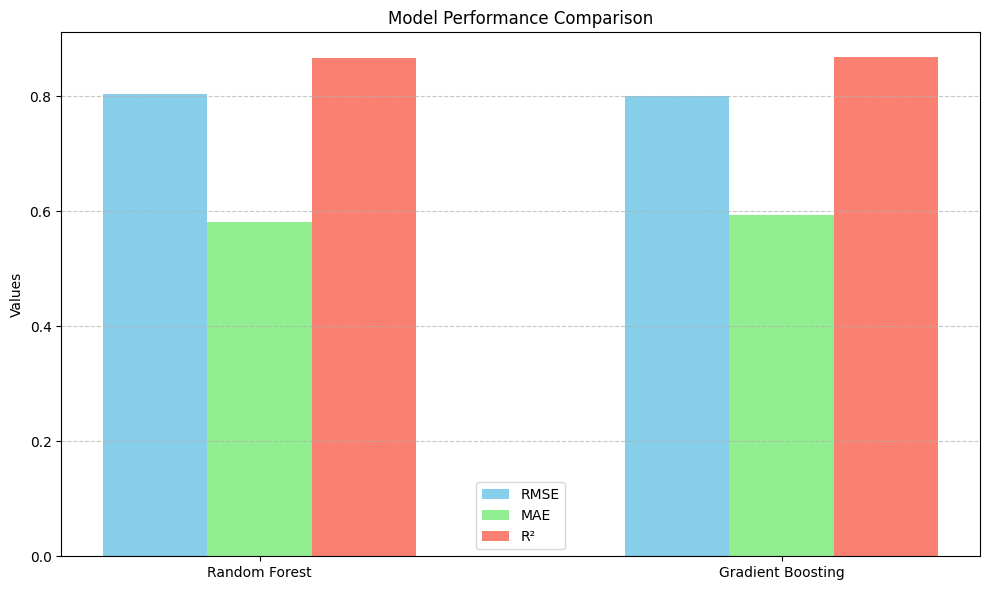

In [ ]:
model_names = ['Random Forest', 'Gradient Boosting']
metrics = ['RMSE', 'MAE', 'R²']
values = np.array([[rf_rmse, gb_rmse],
                   [rf_mae, gb_mae],
                   [rf_r2, gb_r2]])

x = np.arange(len(model_names))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width, values[0], width, label='RMSE', color='skyblue')
bars2 = ax.bar(x, values[1], width, label='MAE', color='lightgreen')
bars3 = ax.bar(x + width, values[2], width, label='R²', color='salmon')

ax.set_ylabel('Values')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Outlier detection and removal

In [ ]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X_train)

#Filter Out Outliers to keep only inliers
inlier_mask = outliers != -1
X_train_cleaned = X_train[inlier_mask]
y_train_cleaned = y_train[inlier_mask]

print("Original training data shape:", X_train.shape)
print("Cleaned training data shape:", X_train_cleaned.shape)

Original training data shape: (915, 4)
Cleaned training data shape: (869, 4)


### Linear Regression

In [ ]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

y_pred_linear = linear_regression.predict(X_test)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

results = {}
results["Linear Regression"] = {"RMSE": rmse_linear, "MAE": mae_linear, "R²": r2_linear}

### Lasso Regression

In [ ]:
lasso_regression = Lasso(alpha=0.1)

lasso_regression.fit(X_train, y_train)

y_pred_lasso = lasso_regression.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

results["Lasso Regression"] = {"RMSE": rmse_lasso, "MAE": mae_lasso, "R²": r2_lasso}


### Ridge Regression

In [ ]:
ridge_regression = Ridge(alpha=1)

ridge_regression.fit(X_train, y_train)

y_pred_ridge = ridge_regression.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

results["Ridge Regression"] = {"RMSE": rmse_ridge, "MAE": mae_ridge, "R²": r2_ridge}


### Random Forest

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=100)

random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

results["Random Forest"] = {"RMSE": rmse_rf, "MAE": mae_rf, "R²": r2_rf}


### Gradient Boosting

In [ ]:
gradient_boosting = GradientBoostingRegressor(random_state=100)

gradient_boosting.fit(X_train, y_train)

y_pred_gb = gradient_boosting.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

results["Gradient Boosting"] = {"RMSE": rmse_gb, "MAE": mae_gb, "R²": r2_gb}


### Support Vector Regression

In [ ]:
svm = SVR(kernel='rbf', C=1, gamma='scale')

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

results["Support Vector Machine"] = {"RMSE": rmse_svm, "MAE": mae_svm, "R²": r2_svm}


### Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(256, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Callbacks: EarlyStopping, ReduceLROnPlateau, and ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)


history = model.fit(X_train_scaled, y_train,
                    epochs=2000,
                    batch_size=32,  # Smaller batch size
                    validation_split=0.2,
                    verbose=0,
                    callbacks=[early_stopping, reduce_lr, checkpoint])

model.load_weights('best_model.keras')


y_pred = model.predict(X_test_scaled).flatten()


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



results["Neural Network"] = {"RMSE": rmse, "MAE": mae, "R²": r2}

results

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


{'Linear Regression': {'RMSE': 1.0102946926942176,
  'MAE': 0.7798302326536797,
  'R²': 0.7891616188563282},
 'Lasso Regression': {'RMSE': 1.025845048279339,
  'MAE': 0.798885406675093,
  'R²': 0.7826212621559017},
 'Ridge Regression': {'RMSE': 1.0103883829466311,
  'MAE': 0.7798890727548345,
  'R²': 0.7891225126089793},
 'Random Forest': {'RMSE': 0.8040286741234801,
  'MAE': 0.5810539700734735,
  'R²': 0.8664645407224186},
 'Gradient Boosting': {'RMSE': 0.8189825929411105,
  'MAE': 0.6074616677710413,
  'R²': 0.8614511669669058},
 'Support Vector Machine': {'RMSE': 0.8792788889295506,
  'MAE': 0.6371187630655488,
  'R²': 0.8402992991618514},
 'Neural Network': {'RMSE': 0.7295066734356004,
  'MAE': 0.5418032455506804,
  'R²': 0.890071052953507}}

### Model Performance Comparison:

In [ ]:
results_df = pd.DataFrame(results).T.sort_values(by="RMSE")

print("Model Performance Comparison:")
results_df

Model Performance Comparison:


,RMSE,MAE,R²
Neural Network,0.729507,0.541803,0.890071
Random Forest,0.804029,0.581054,0.866465
Gradient Boosting,0.818983,0.607462,0.861451
Support Vector Machine,0.879279,0.637119,0.840299
Linear Regression,1.010295,0.779830,0.789162
Ridge Regression,1.010388,0.779889,0.789123
Lasso Regression,1.025845,0.798885,0.782621


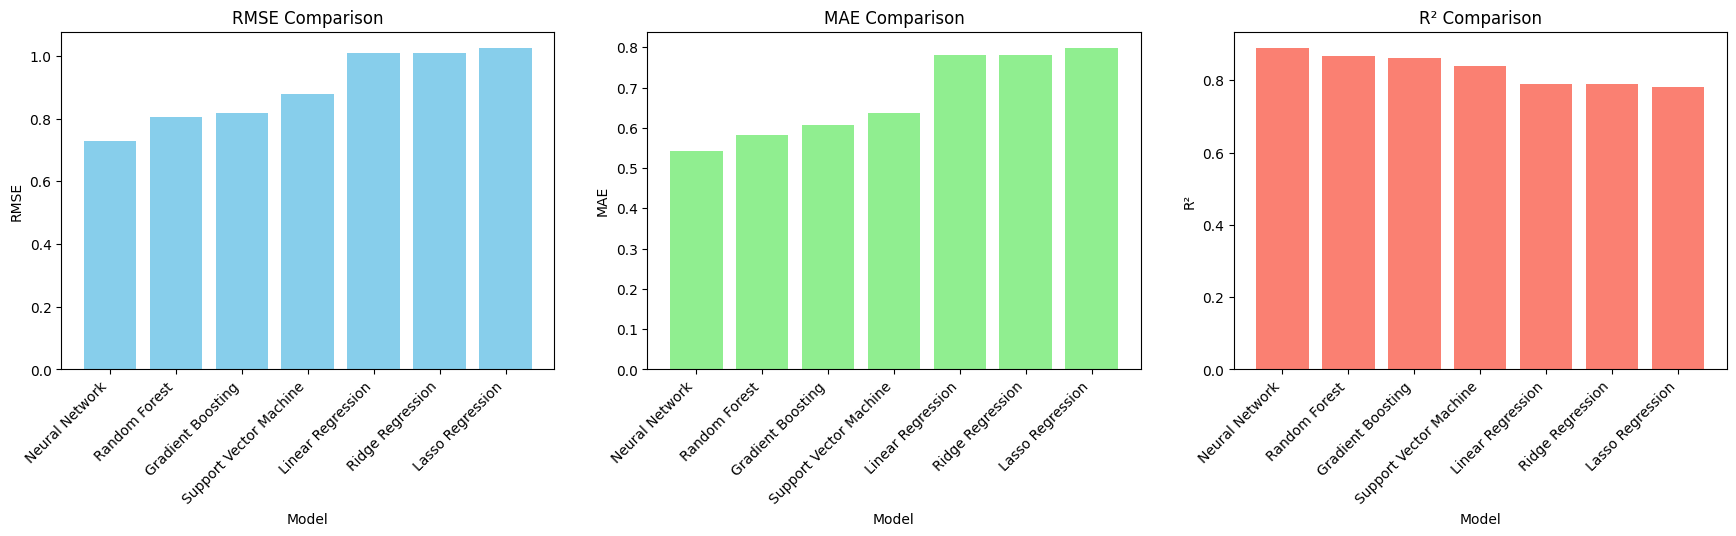

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(results_df.index, results_df['RMSE'], color='skyblue')
axes[0].set_title('RMSE Comparison')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('RMSE')

axes[1].bar(results_df.index, results_df['MAE'], color='lightgreen')
axes[1].set_title('MAE Comparison')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('MAE')

axes[2].bar(results_df.index, results_df['R²'], color='salmon')
axes[2].set_title('R² Comparison')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('R²')

for ax in axes:
    ax.set_xticks(range(len(results_df.index)))
    ax.set_xticklabels(results_df.index, rotation=45, ha='right')

fig.tight_layout(pad=3.0)

plt.show()


# Data Visualization

### Plot Predicted vs. Actual Solubility Values

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


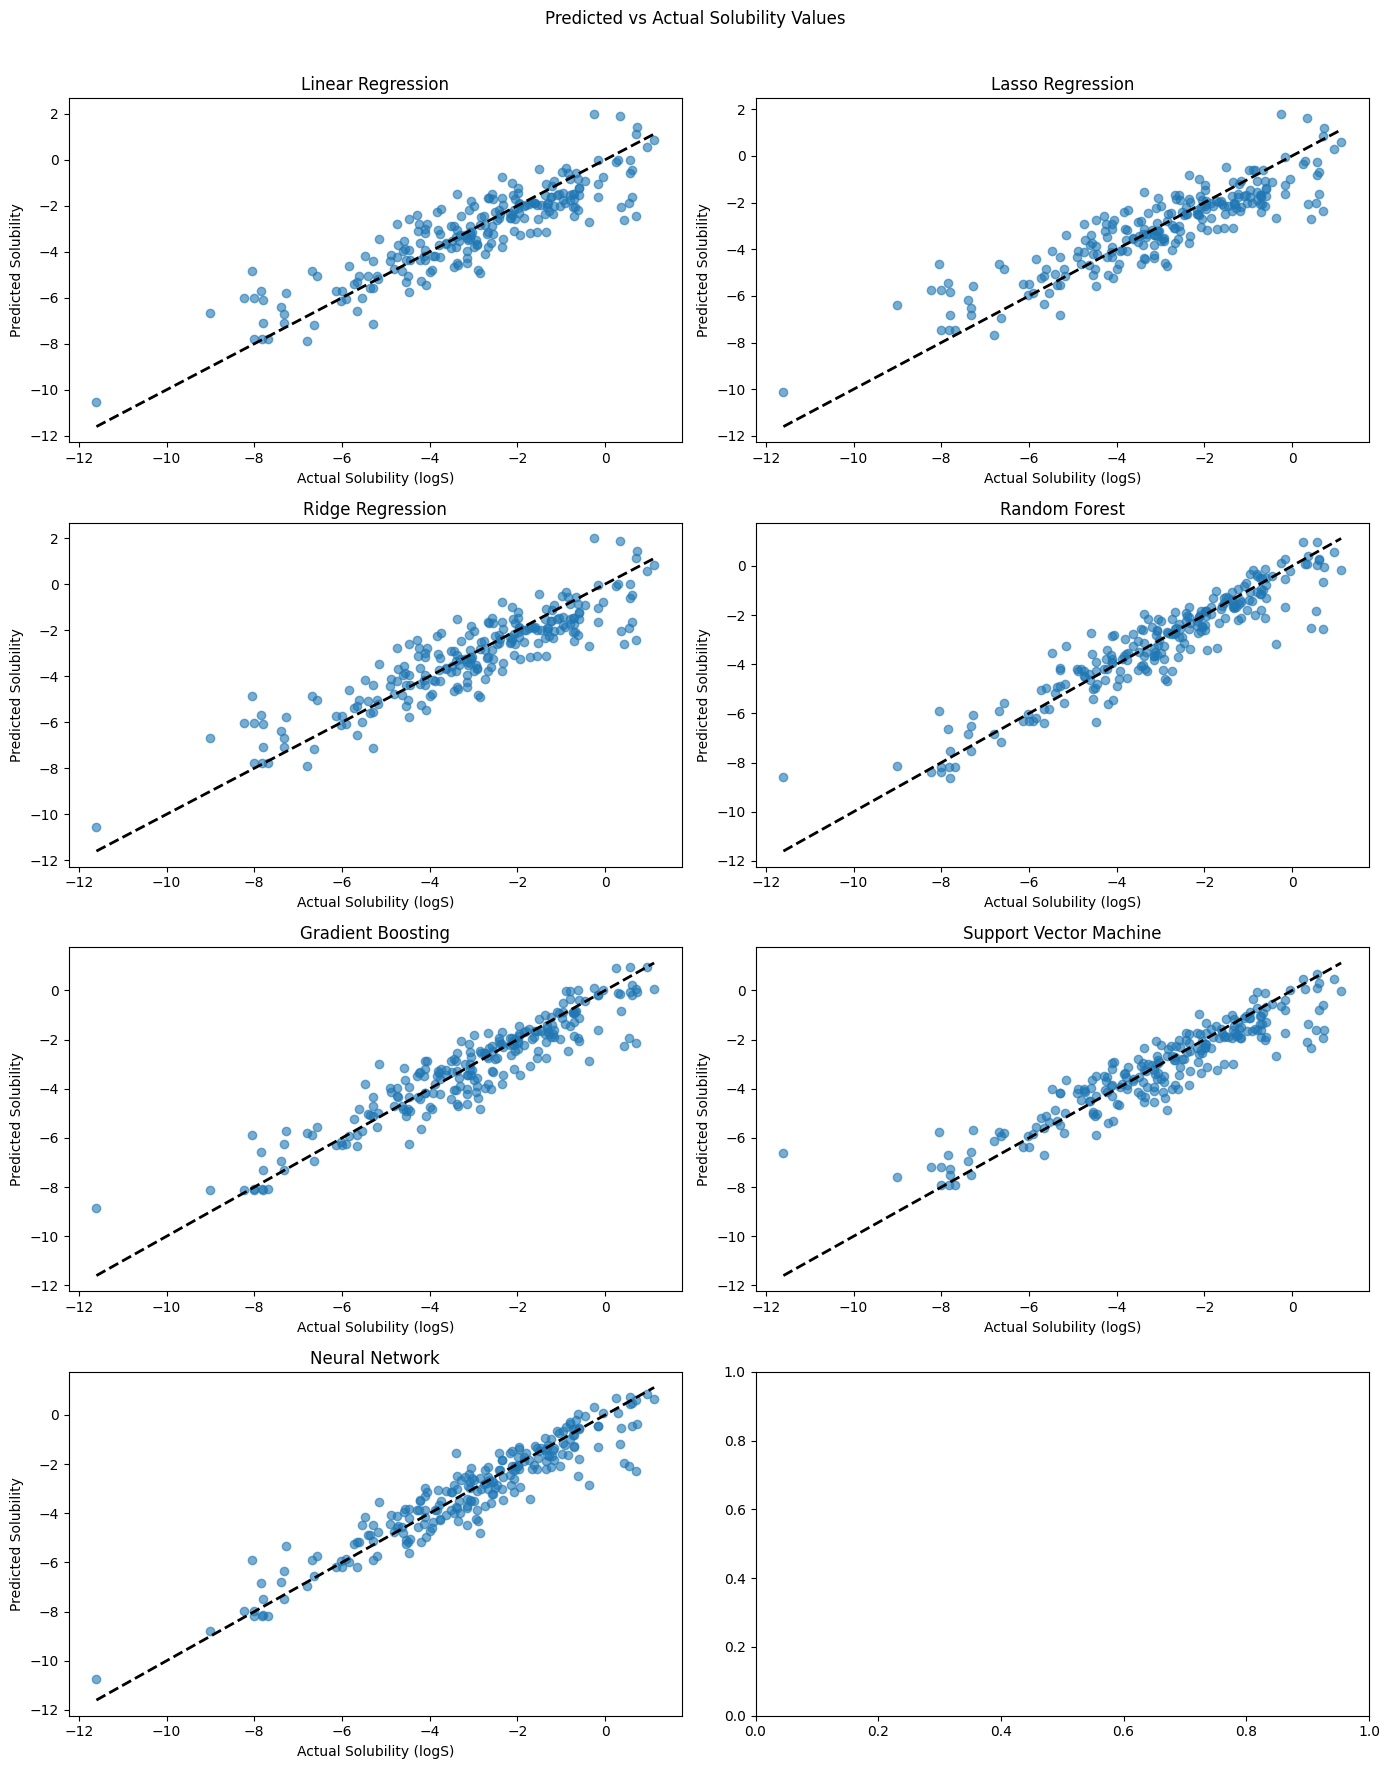

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_predictions = {
    "Linear Regression": y_pred_linear,
    "Lasso Regression": y_pred_lasso,
    "Ridge Regression": y_pred_ridge,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "Support Vector Machine": y_pred_svm,
    "Neural Network": model.predict(X_test).flatten()
}


fig, axes = plt.subplots(4, 2, figsize=(14, 18))
fig.suptitle('Predicted vs Actual Solubility Values')

for ax, (model_name, y_pred) in zip(axes.flatten(), y_predictions.items()):
    ax.scatter(y_test, y_pred, alpha=0.6)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax.set_xlabel("Actual Solubility (logS)")
    ax.set_ylabel("Predicted Solubility")
    ax.set_title(model_name)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


### Feature Importance(for applicable models)

Random Forest Feature Importances:
MolLogP: 0.8332
MolWt: 0.1269
NumRotatableBonds: 0.0184
AromaticProportion: 0.0216


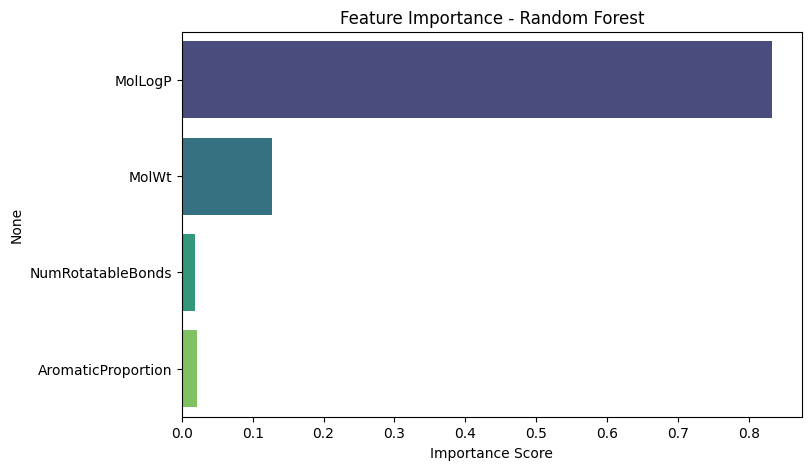

Gradient Boosting Feature Importances:
MolLogP: 0.8725
MolWt: 0.1092
NumRotatableBonds: 0.0058
AromaticProportion: 0.0125


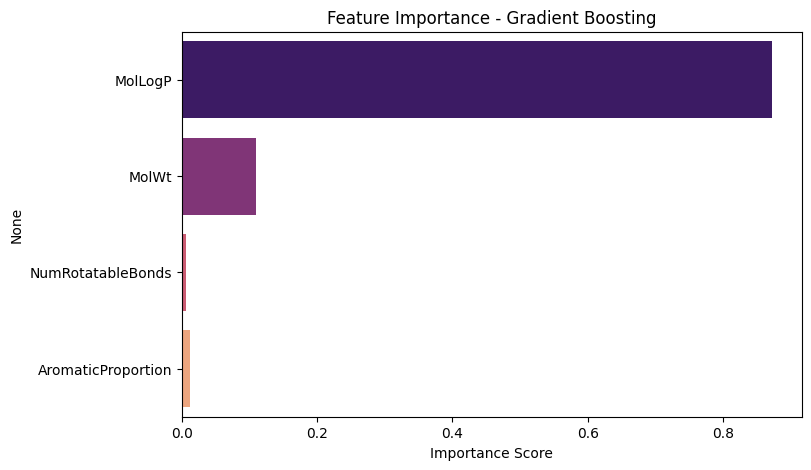

In [ ]:
feature_importances_rf = random_forest.feature_importances_
feature_names = df.drop(columns=["logS"]).columns

print("Random Forest Feature Importances:")
for name, score in zip(feature_names, feature_importances_rf):
    print(f"{name}: {score:.4f}")

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances_rf, y=feature_names, hue=feature_names, palette="viridis", legend=False)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.show()

feature_importances_gb = gradient_boosting.feature_importances_

print("Gradient Boosting Feature Importances:")
for name, score in zip(feature_names, feature_importances_gb):
    print(f"{name}: {score:.4f}")

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances_gb, y=feature_names, hue=feature_names, palette="magma", legend=False)
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance Score")
plt.show()
